In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil

FFO=pd.read_csv('AB.csv', index_col= 0)


In [2]:
FFO.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate,Year,binnedOREB
0,2025 Abilene Christian,47.456214,20.614869,28.205128,39.616347,2025,post-change
1,2025 Air Force,50.279107,20.779381,24.039653,37.240829,2025,post-change
2,2025 Akron,55.272346,17.293210,32.758621,24.441341,2025,post-change
3,2025 Alabama,56.504599,17.668644,37.049550,41.721419,2025,post-change
4,2025 Alabama A&M,44.880677,21.762263,35.225956,37.875289,2025,post-change


In [3]:
FFO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8304 entries, 0 to 8303
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team/Year   8304 non-null   object 
 1   eFGPct      8304 non-null   float64
 2   TOPct       8304 non-null   float64
 3   ORPct       8304 non-null   float64
 4   FTRate      8304 non-null   float64
 5   Year        8304 non-null   int64  
 6   binnedOREB  8304 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 519.0+ KB


Hypothesis: The NCAA moved the men's three point line back in 2019. I want to conduct a hypothesis test to determine whether the change in shot distance has affected the percentage of shots that are rebounded by the offensive team.
If the hypothesis is true, this would indicate a change in the strategic approach of coaches to the game.

We will set up two tests; the first, taking the entire datasets using 

In [4]:
pre_change=FFO[FFO['binnedOREB'] == 'pre-change']
post_change=FFO[FFO['binnedOREB'] == 'post-change']

In [5]:
pre_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6157 entries, 2147 to 8303
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team/Year   6157 non-null   object 
 1   eFGPct      6157 non-null   float64
 2   TOPct       6157 non-null   float64
 3   ORPct       6157 non-null   float64
 4   FTRate      6157 non-null   float64
 5   Year        6157 non-null   int64  
 6   binnedOREB  6157 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 384.8+ KB


In [6]:
post_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2147 entries, 0 to 2146
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team/Year   2147 non-null   object 
 1   eFGPct      2147 non-null   float64
 2   TOPct       2147 non-null   float64
 3   ORPct       2147 non-null   float64
 4   FTRate      2147 non-null   float64
 5   Year        2147 non-null   int64  
 6   binnedOREB  2147 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 134.2+ KB


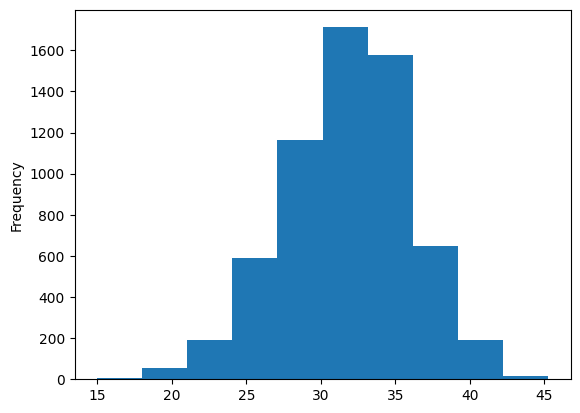

In [7]:
ax = pre_change['ORPct'].plot.hist()

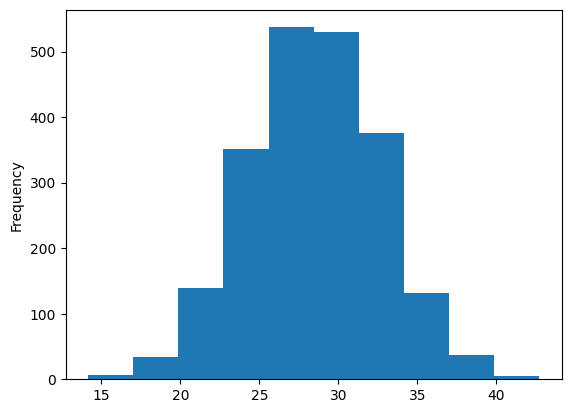

In [8]:
ax = post_change['ORPct'].plot.hist()

In [9]:
alpha=0.05
t_stat, p_val = stats.ttest_ind(pre_change['ORPct'],post_change['ORPct'], equal_var=False, alternative='greater')
if p_val < alpha:
    print('the offensive rebounding percentages increased significantly after the three-point line was moved back.')
elif p_val > alpha:
    print('the difference is not statistically significant')


the offensive rebounding percentages increased significantly after the three-point line was moved back.


In [10]:
import random
a_sample = random.sample(sorted(pre_change['ORPct']),100)
b_sample = random.sample(sorted(post_change['ORPct']),100)

(array([ 2.,  3.,  5.,  9., 15., 17., 21., 14., 11.,  3.]),
 array([18.91025641, 21.01997077, 23.12968513, 25.23939949, 27.34911385,
        29.45882821, 31.56854256, 33.67825692, 35.78797128, 37.89768564,
        40.0074    ]),
 <BarContainer object of 10 artists>)

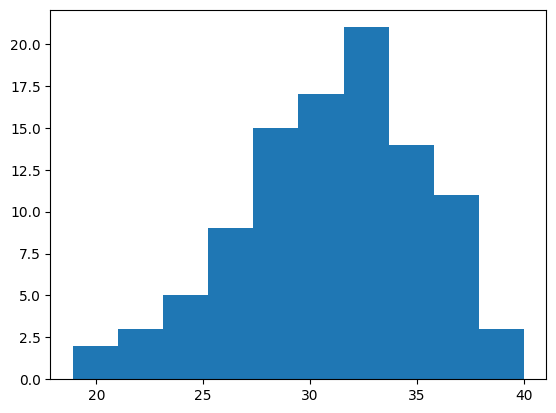

In [11]:
plt.hist(a_sample)

(array([ 3.,  9.,  7., 17., 22., 21.,  8.,  7.,  4.,  2.]),
 array([19.9807877 , 21.93210387, 23.88342004, 25.83473621, 27.78605238,
        29.73736855, 31.68868472, 33.64000089, 35.59131706, 37.54263323,
        39.49394939]),
 <BarContainer object of 10 artists>)

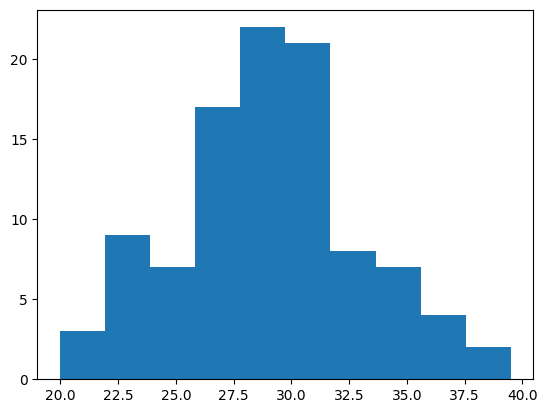

In [12]:
plt.hist(b_sample)

In [15]:
alpha = 0.05

t_stat, p_val = stats.ttest_rel(a_sample,b_sample, alternative='greater')
if p_val < alpha:
    print('the offensive rebounding percentages increased significantly after the three-point line was moved back.')
elif p_val > alpha:
    print('the difference is not statistically significant')

the offensive rebounding percentages increased significantly after the three-point line was moved back.
